<a href="https://colab.research.google.com/github/JyothiKumar03/Stock-Price-Prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ML model to predict the stock price of the entered stock
# this is done using the yahoo finance api - fetching the live stream data and working on it


#ML model to predict the stock price of the entered stock
# this is done using the yahoo finance api - fetching the live stream data and working on it


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import yfinance as yf

In [4]:
from plotly import graph_objs as go
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
from googlesearch import search
from yfinance import *
import pandas_datareader as web
#fetching the code name of the stock in the API
def get_name(self):
  searchval = 'yahoo finance' +self
  link = []
  searchs = search(searchval, tld = 'es', lang = 'es', stop = 5)
  for url in searchs:
    link.append(url)
  link = str(link[0])
  link = link.split("/")
  if link[-1] == '':
    ticker = link[-2]
  else:
    x = link[-1].split('=')
    tikcer  = x[-1]
  return ticker 
company_name = input("Enter the name of the company: ")
company = get_name(company_name)
x = company.split(".")
print(x)

Enter the name of the company: Mahindra
['M&M', 'NS']


In [9]:
try:
  if(x[1]=='BO'):
    company = x[0]+'.'+'NS'
    print(company)
except:
  print(company)
#print(company)
cur = yf.Ticker(company)
details = cur.info
currency = details['currency']
try:
  desc = details['longBuisnessSummary']
except:
  try:
    desc = details['description']
  except:
    desc = ' '
if desc!=' ':
  print("Description of the company : ")
  print(desc)
print("currency : ",currency)

currency :  INR


In [10]:
df = yf.download(company, period='300d', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [11]:
print(currency)
if(currency!='INR'):
  print("Foreign market listed company")
else:
  print("Indian market listed company")

INR
Indian market listed company


In [12]:
if currency!='INR':
  import requests
  url = 'https://v6.exchangerate-api.com/v6/d81efaa7bb08ee79f61d3170/latest/'+currency
  response = requests.get(url)
  currency_rate = response.json()
  rate = currency_rate["converstion_rates"]["INR"]
  print(rate)
else:
  rate=1

In [13]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,1218.000000,1234.900024,1202.000000,1218.250000,1218.250000,4120736
2022-11-22,1220.650024,1235.449951,1215.949951,1228.449951,1228.449951,2469455
2022-11-23,1234.599976,1240.349976,1224.000000,1235.699951,1235.699951,2396267
2022-11-24,1241.900024,1257.000000,1238.650024,1254.050049,1254.050049,2133523
2022-11-25,1258.000000,1267.699951,1246.000000,1260.800049,1260.800049,1370326


In [14]:
df['Open'] = df['Open'].apply(lambda x:x*rate)
df['High'] = df['High'].apply(lambda x:x*rate)
df['Low'] = df['Low'].apply(lambda x:x*rate)
df['Close'] = df['Close'].apply(lambda x:x*rate)
df['Adj Close'] = df['Adj Close'].apply(lambda x:x*rate)


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2021-09-13 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       300 non-null    float64
 1   High       300 non-null    float64
 2   Low        300 non-null    float64
 3   Close      300 non-null    float64
 4   Adj Close  300 non-null    float64
 5   Volume     300 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.4 KB


In [16]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,1218.000000,1234.900024,1202.000000,1218.250000,1218.250000,4120736
2022-11-22,1220.650024,1235.449951,1215.949951,1228.449951,1228.449951,2469455
2022-11-23,1234.599976,1240.349976,1224.000000,1235.699951,1235.699951,2396267
2022-11-24,1241.900024,1257.000000,1238.650024,1254.050049,1254.050049,2133523
2022-11-25,1258.000000,1267.699951,1246.000000,1260.800049,1260.800049,1370326


In [17]:
# df = df.reset_index() #uncomment it again
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,753.500000,753.500000,740.349976,745.549988,737.998657,3139833
2021-09-14,744.799988,752.549988,744.650024,750.200012,742.601624,3089381
2021-09-15,752.000000,760.000000,746.500000,755.099976,747.451965,3336656
2021-09-16,759.849976,761.000000,751.349976,756.950012,749.283264,2686018
2021-09-17,758.200012,766.000000,749.150024,754.150024,746.511597,5504398


In [18]:
df = df.round(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,753.50,753.50,740.35,745.55,738.00,3139833
2021-09-14,744.80,752.55,744.65,750.20,742.60,3089381
2021-09-15,752.00,760.00,746.50,755.10,747.45,3336656
2021-09-16,759.85,761.00,751.35,756.95,749.28,2686018
2021-09-17,758.20,766.00,749.15,754.15,746.51,5504398


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2021-09-13 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       300 non-null    float64
 1   High       300 non-null    float64
 2   Low        300 non-null    float64
 3   Close      300 non-null    float64
 4   Adj Close  300 non-null    float64
 5   Volume     300 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.4 KB


In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,753.50,753.50,740.35,745.55,738.00,3139833
2021-09-14,744.80,752.55,744.65,750.20,742.60,3089381
2021-09-15,752.00,760.00,746.50,755.10,747.45,3336656
2021-09-16,759.85,761.00,751.35,756.95,749.28,2686018
2021-09-17,758.20,766.00,749.15,754.15,746.51,5504398


In [21]:
#details of our dataframe
print("Shape of the dataframe - ",df.shape)
print("Null value present: - ",df.isnull().values.any())
print("no of 0 volumes: ",(df['Volume']==0).sum())

Shape of the dataframe -  (300, 6)
Null value present: -  False
no of 0 volumes:  0


In [22]:
df = df.drop(df[df['Volume']==0].index)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,753.50,753.50,740.35,745.55,738.00,3139833
2021-09-14,744.80,752.55,744.65,750.20,742.60,3089381
2021-09-15,752.00,760.00,746.50,755.10,747.45,3336656
2021-09-16,759.85,761.00,751.35,756.95,749.28,2686018
2021-09-17,758.20,766.00,749.15,754.15,746.51,5504398
...,...,...,...,...,...,...
2022-11-21,1218.00,1234.90,1202.00,1218.25,1218.25,4120736
2022-11-22,1220.65,1235.45,1215.95,1228.45,1228.45,2469455
2022-11-23,1234.60,1240.35,1224.00,1235.70,1235.70,2396267


In [23]:
#configuring our figure object
fig = go.Figure()
frame = df
#traces setup
fig.add_trace(go.Candlestick(
    x = df.index,
    open = df['Open'],
    high = df['High'],
    low = df['Low'],
    close = df['Close'],
    name = 'market data'
))
#adding titles to figure
fig.update_layout(
    title = company_name + ' Stock price',
    yaxis_title = 'Stock Price (Rs. per share)'
)

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list(
            [
                dict(count=1,label="30m",step="minute",stepmode="backward"),
                dict(count=6,label="90m",step="minute",stepmode="backward"),
                dict(count=1,label="HTD",step="hour",stepmode="todate"),
                dict(step="all")
            ]
        )
    )
)
#show the figure
fig.show()



**DATA MODELING** 

Data Splitting

In [24]:
#mData is model data
#frame is our initially created data frame
mData = frame.copy(deep=True)
mData

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,753.50,753.50,740.35,745.55,738.00,3139833
2021-09-14,744.80,752.55,744.65,750.20,742.60,3089381
2021-09-15,752.00,760.00,746.50,755.10,747.45,3336656
2021-09-16,759.85,761.00,751.35,756.95,749.28,2686018
2021-09-17,758.20,766.00,749.15,754.15,746.51,5504398
...,...,...,...,...,...,...
2022-11-21,1218.00,1234.90,1202.00,1218.25,1218.25,4120736
2022-11-22,1220.65,1235.45,1215.95,1228.45,1228.45,2469455
2022-11-23,1234.60,1240.35,1224.00,1235.70,1235.70,2396267


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
#MinMax Scalar
mean = mData["Close"].mean()
max_value = mData["Close"].max()
min_value = mData["Close"].min()
range = max_value - min_value
print(range)
if(range>1200):
  mData['Close'] = frame['Close'].apply(lambda x: abs((x-mean)/range))

663.5


In [27]:
mData

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,753.50,753.50,740.35,745.55,738.00,3139833
2021-09-14,744.80,752.55,744.65,750.20,742.60,3089381
2021-09-15,752.00,760.00,746.50,755.10,747.45,3336656
2021-09-16,759.85,761.00,751.35,756.95,749.28,2686018
2021-09-17,758.20,766.00,749.15,754.15,746.51,5504398
...,...,...,...,...,...,...
2022-11-21,1218.00,1234.90,1202.00,1218.25,1218.25,4120736
2022-11-22,1220.65,1235.45,1215.95,1228.45,1228.45,2469455
2022-11-23,1234.60,1240.35,1224.00,1235.70,1235.70,2396267


In [28]:
mData.shape

(300, 6)

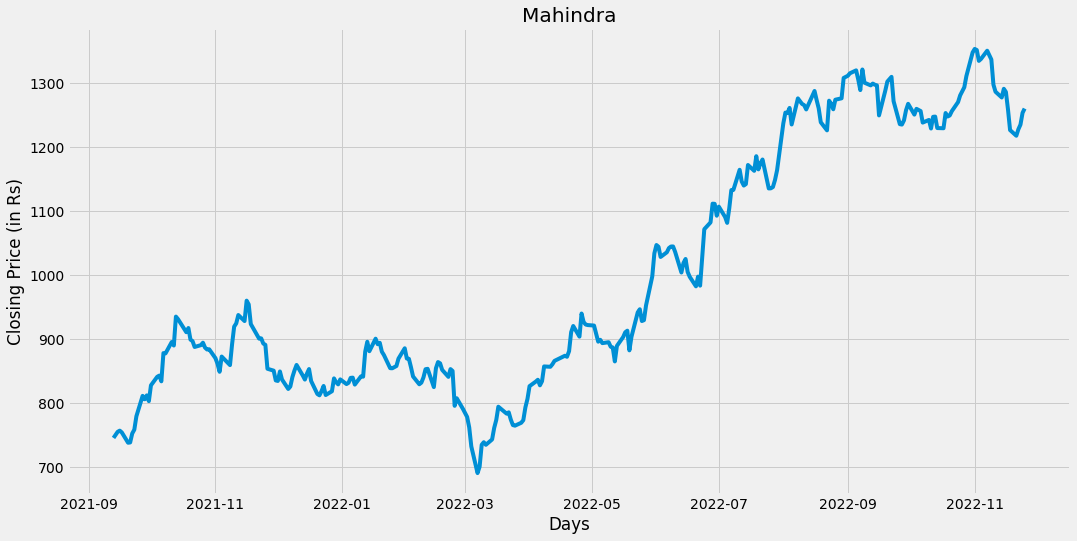

In [29]:
plt.figure(figsize=(16,8))
plt.title(company_name)
plt.xlabel("Days")
plt.ylabel("Closing Price (in Rs)")
plt.plot(mData['Close'])

In [30]:
cData = mData[['Close']]
cData.head()

,Close
Date,
2021-09-13,745.55
2021-09-14,750.20
2021-09-15,755.10
2021-09-16,756.95
2021-09-17,754.15


In [31]:
import math
future_days = math.ceil(0.2*len(cData))
cData['Prediction'] = cData[['Close']].shift(-future_days)
cData.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Prediction
Date,,
2022-11-21,1218.25,NaN
2022-11-22,1228.45,NaN
2022-11-23,1235.70,NaN
2022-11-24,1254.05,NaN
2022-11-25,1260.80,NaN


In [32]:
import numpy as np
X = np.array(cData.drop(['Prediction'],1))[:-future_days]
# X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [33]:
Y = np.array(cData['Prediction'])[:-future_days]
#Y

In [34]:
from sklearn.model_selection import train_test_split
x_train,y_test,y_train,x_test = train_test_split(X,Y,test_size=0.25)
# x_train

In [35]:
x_future = cData.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [36]:
cData

,Close,Prediction
Date,,
2021-09-13,745.55,851.10
2021-09-14,750.20,859.70
2021-09-15,755.10,843.10
2021-09-16,756.95,836.85
2021-09-17,754.15,846.20
...,...,...
2022-11-21,1218.25,NaN
2022-11-22,1228.45,NaN
2022-11-23,1235.70,NaN


MODELING

importing required libraries

In [37]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import math

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Fitting the models

In [39]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
rf = RandomForestRegressor(n_estimators = 1000,random_state = 42).fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train,y_train)
lasso_reg = Lasso(normalize=True)
lasso_reg.fit(x_train,y_train)
knn = KNeighborsRegressor(n_neighbors=8)
KNeighborsRegressor(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=8,p=2,weights='uniform')
knn.fit(x_train,y_train)
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
gbr.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=600)

Linear Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R squared value -  -7.400102929247895
MSE value -  11266.571809708692
MAPE value -  0.06529800137263737
MAE value -  83.80173714516245


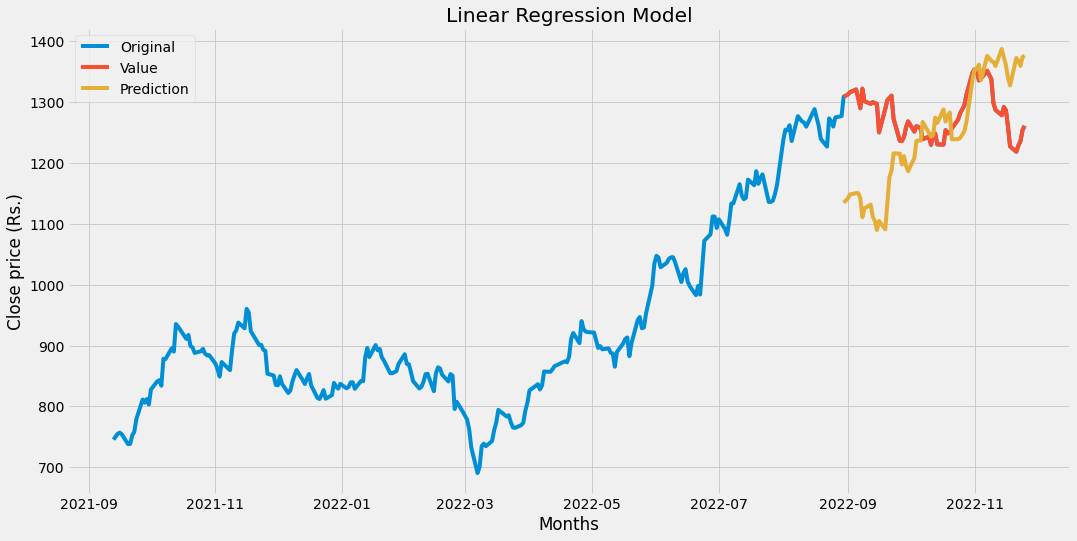

In [40]:
lr_prediction = lr.predict(x_future)
predictions = lr_prediction
valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Linear Regression Model")
plt.xlabel("Months")
plt.ylabel("Close price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_lr = mean_absolute_error(valid['Close'],predictions)
mape_lr = mean_absolute_percentage_error(valid['Close'],predictions)
mse_lr = mean_squared_error(valid['Close'],predictions)
r2_lr = r2_score(valid['Close'],predictions)
print("R squared value - ",r2_lr)
print("MSE value - ",mse_lr)
print("MAPE value - ",mape_lr)
print("MAE value - ",mae_lr)
plt.show()


Decision Tree

In [41]:
tree_prediction = tree.predict(x_future)
#tree_prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_squared value -  -7.400102929247895
MSE value -  11266.571809708692
MAPE value -  0.06529800137263737
MAE value -  83.80173714516245


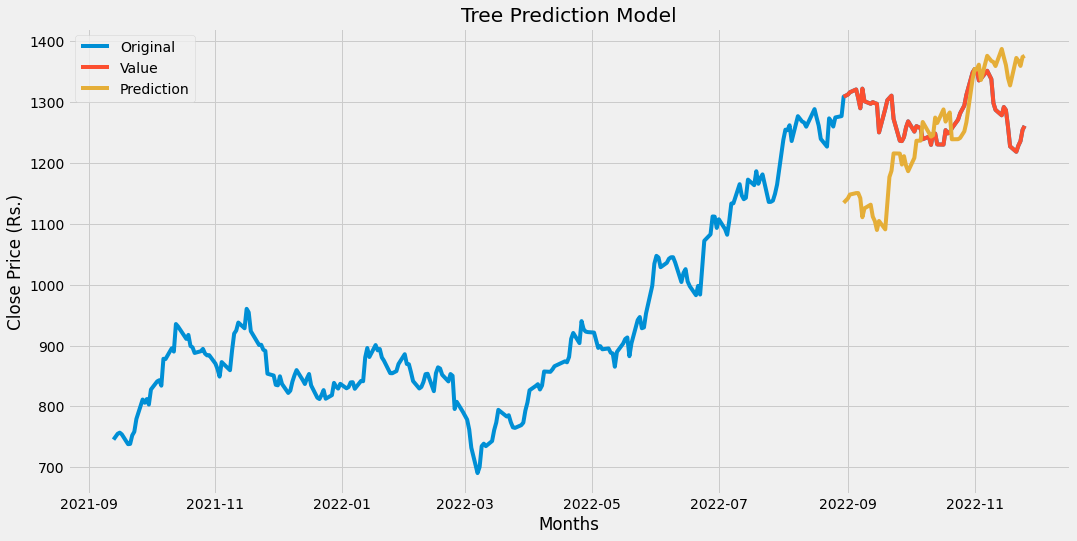

In [42]:
predicitons = tree_prediction
valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Tree Prediction Model")
plt.xlabel("Months")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_tree = mean_absolute_error(valid['Close'],predictions)
mape_tree = mean_absolute_percentage_error(valid['Close'],predictions)
mse_tree = mean_squared_error(valid['Close'],predictions)
r2_tree = r2_score(valid['Close'],predictions)
print("R_squared value - ",r2_tree)
print("MSE value - ",mse_tree)
print("MAPE value - ",mape_tree)
print("MAE value - ",mae_tree)
plt.show()

KNN Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  -0.004733833007099175
MSE =  1347.5913300781272
MAPE =  0.02056505090061957
MAE =  26.33968750000002


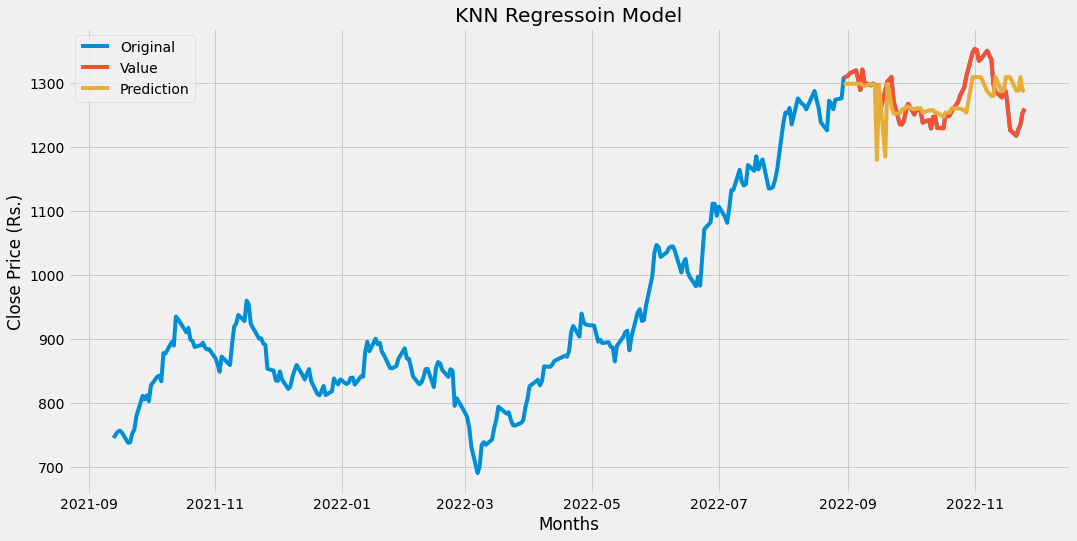

In [43]:
knn_pred = knn.predict(x_future)
predictions = knn_pred

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("KNN Regressoin Model")
plt.xlabel("Months")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_knn = mean_absolute_error(valid['Close'], predictions)
mape_knn = mean_absolute_percentage_error(valid['Close'], predictions)
mse_knn = mean_squared_error(valid['Close'], predictions)
r2_knn =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_knn)
print("MSE = ",mse_knn)
print("MAPE = ",mape_knn)
print("MAE = ",mae_knn)
plt.show()



Gradient Boosting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.6379816318772329
MSE =  485.554281327586
MAPE =  0.012331616935303385
MAE =  15.7934015580567


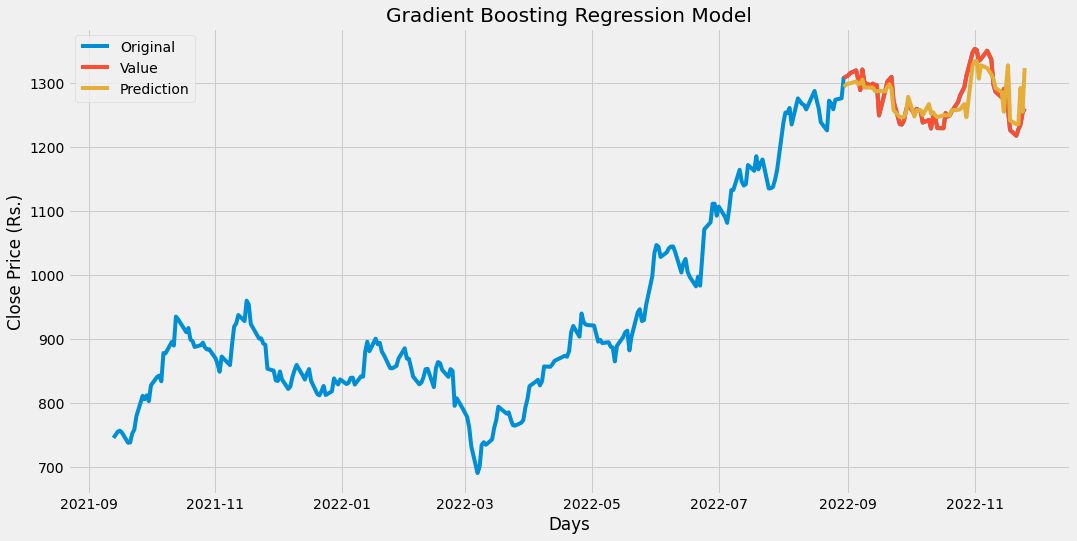

In [44]:
gbr_pred = gbr.predict(x_future)
predictions = gbr_pred

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Gradient Boosting Regression Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_gbr = mean_absolute_error(valid['Close'], predictions)
mape_gbr = mean_absolute_percentage_error(valid['Close'], predictions)
mse_gbr = mean_squared_error(valid['Close'], predictions)
r2_gbr =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_gbr)
print("MSE = ",mse_gbr)
print("MAPE = ",mape_gbr)
print("MAE = ",mae_gbr)
plt.show()

Tabulation of Output

In [46]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from tabulate import tabulate

In [48]:
table = [['Model Name', 'R2 score', 'MSE','MAPE','MAE'], 
         ['Linear Regression', r2_lr, mse_lr,mape_lr,mae_lr],
         ['Decision Tree', r2_tree, mse_tree,mape_tree,mae_tree],
         ['KNN ', r2_knn, mse_knn,mape_knn,mae_knn],
         ['Gradient Boosting', r2_gbr, mse_gbr,mape_gbr,mae_gbr],
         ]

In [52]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═════════════╤═══════════╤═══════════╤═════════╕
│ Model Name        │    R2 score │       MSE │      MAPE │     MAE │
╞═══════════════════╪═════════════╪═══════════╪═══════════╪═════════╡
│ Linear Regression │ -7.4001     │ 11266.6   │ 0.065298  │ 83.8017 │
├───────────────────┼─────────────┼───────────┼───────────┼─────────┤
│ Decision Tree     │ -7.4001     │ 11266.6   │ 0.065298  │ 83.8017 │
├───────────────────┼─────────────┼───────────┼───────────┼─────────┤
│ KNN               │ -0.00473383 │  1347.59  │ 0.0205651 │ 26.3397 │
├───────────────────┼─────────────┼───────────┼───────────┼─────────┤
│ Gradient Boosting │  0.637982   │   485.554 │ 0.0123316 │ 15.7934 │
╘═══════════════════╧═════════════╧═══════════╧═══════════╧═════════╛
